<a href="https://colab.research.google.com/github/SS524/NLP/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

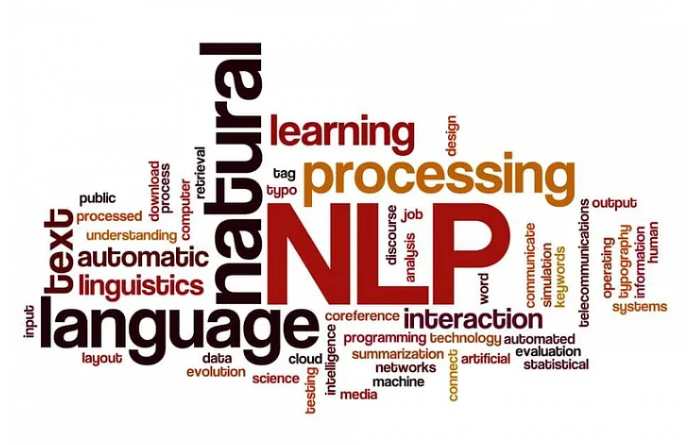
#**What is Text Preprocessing?**
###In natural language processing, text preprocessing is the practice of cleaning and preparing text data

#**Why is this important?**
###Text preprocessing improves the performance of an NLP system. For tasks such as sentiment analysis, document categorization, document retrieval based upon user queries, and more, adding a text preprocessing layer provides more accuracy.

###We will perform text preprocessing on a movie dataset



##**Importing necessary libraries**

In [382]:
import requests
import json
import pandas as pd

##**Data Acquisition**
###In this step, we collected the data from two APIs and stored that into the dataframe for further processing

In [383]:
movie_dic={
    'Name':[],
    'Description':[],
    'Genre_IDs':[]
}
for i in range(1,6):
  response_movies = requests.get("https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page="+str(i))
  json_movie=json.loads(response_movies.text)
  list_of_movies=json_movie["results"]
  for movie in list_of_movies:
    movie_dic['Name'].append(movie["original_title"])
    movie_dic['Description'].append(movie['overview'])
    movie_dic['Genre_IDs'].append(movie['genre_ids'])

In [384]:
genre_dic={}
response_genre=requests.get("https://api.themoviedb.org/3/genre/movie/list?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US")
json_genre=json.loads(response_genre.text)
list_of_genres=json_genre['genres']
for genre in list_of_genres:
  genre_dic[genre['id']]=genre['name']

In [385]:
df=pd.DataFrame(movie_dic)
df.head()

,Name,Description,Genre_IDs
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]"
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"[18, 80]"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]"
3,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...","[35, 18, 10749]"
4,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]"


In [386]:
def genre_ids_to_genres(genre_ids):
  genres=[]
  for id in genre_ids:
    genres.append(genre_dic[id])
  return ", ".join(genres)


In [387]:
df['Genres']=df['Genre_IDs'].apply(lambda x:genre_ids_to_genres(x))
df.drop("Genre_IDs",axis=1,inplace=True)
df.head()

,Name,Description,Genres
0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...","Comedy, Drama, Romance"
4,Schindler's List,The true story of how businessman Oskar Schind...,"Drama, History, War"


###This is our final dataframe. We will perform couple of text preprocessing steps on the **Description** column

###**We are going to take the following text preprocessing steps in this specific order.**


*   Lowercasing
*   Removing HTML tags

*   Removing URLs
*   Removing punctuations

*   Chat word treatment
*   Spelling correction

*   Removing stop words
*   Handling emojis

*   Tokenization
*   Stemming

*   Lemmatization


















##**Lowercasing:**

In [388]:
df['Description']=df['Description'].str.lower()
df.head()

,Name,Description,Genres
0,The Godfather,"spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing saga of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"raj is a rich, carefree, happy-go-lucky second...","Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oskar schind...,"Drama, History, War"


##**Removing HTML tags:**

In [389]:
import re  # importing regular expression module
def remove_html_tags(text):  # method for finding out the html tag pattern and replacing that with the empty string
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)


# Let's check whether this method is working fine or not.
text="This is your URL<p>Please click on this</p><a href='https://google.com'>Google</a>"
print(remove_html_tags(text))

This is your URLPlease click on thisGoogle


In [390]:
# We can see that all the HTML tags are now removed. Let's apply this function to our dataframe

df['Description']=df['Description'].apply(lambda x:remove_html_tags(x))
df.head()

,Name,Description,Genres
0,The Godfather,"spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing saga of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"raj is a rich, carefree, happy-go-lucky second...","Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oskar schind...,"Drama, History, War"


##**Removing URLs**:

In [391]:
def remove_url(text):  # method for removing the url from the text
  pattern=re.compile('http://\S+|https://\S+')
  return pattern.sub(r'',text)


# Let's try out this function
text_1="Check out google https://www.google.com"
text_2="Check out my website http://www.abc.com"
print(remove_url(text_1))
print(remove_url(text_2))

Check out google 
Check out my website 


In [392]:
# We can see that all the URLs are removed. Let's apply this function to our dataframe
df['Description']=df['Description'].apply(lambda x:remove_url(x))
df.head()

,Name,Description,Genres
0,The Godfather,"spanning the years 1945 to 1955, a chronicle o...","Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing saga of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"raj is a rich, carefree, happy-go-lucky second...","Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oskar schind...,"Drama, History, War"


##**Removing punctuations:**

In [393]:
import string  # importing string module
exclude=string.punctuation  # string module has a property called punctuation.
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [394]:
def remove_punctuation(text):  # method to remove punctuation
  return text.translate(str.maketrans('','',exclude))

# Let's try out this function
text="Hello!. How are you?"
print(remove_punctuation(text))

Hello How are you


In [395]:
# We can see that all the punctuations are removed. Let's apply this method on the dataframe
df['Description']=df['Description'].apply(lambda x:remove_punctuation(x))
df.head()

,Name,Description,Genres
0,The Godfather,spanning the years 1945 to 1955 a chronicle of...,"Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing saga of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,raj is a rich carefree happygolucky second gen...,"Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oskar schind...,"Drama, History, War"


##**Chat words treatment:**
###Example:

*   ASAP - As soon as possible
*   IMO - In my opinion

*   TBH - To be honest
*   GN - Good night

### etc.





In [396]:
# Let's try to fetch the list of all chat words from an external source and store that into an dataframe

response=requests.get("https://raw.githubusercontent.com/rishabhverma17/sms_slang_translator/master/slang.txt").text
list_chat_words=response.split("\n")
chat_words_dic={}
for chat_word in list_chat_words:
  if chat_word=="QPSA?	Que Pasa?":
    continue
  chat_words_dic[chat_word.split("=")[0]]=chat_word.split("=")[1]
print(chat_words_dic)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [397]:
def chat_word_conversion(text):  # method to convert the chat words
  new_word=[]
  for word in text.split():
    if word.upper() in chat_words_dic:
      new_word.append(chat_words_dic[word.upper()])
    else:
      new_word.append(word)
  return " ".join(new_word)

# Let's try this method
text="Please send this document asap"
chat_word_conversion(text)

'Please send this document As Soon As Possible'

In [398]:
# We can see that asap has been converted to its full form. We will now apply this method to our dataframe
df['Description']=df['Description'].apply(lambda x:chat_word_conversion(x))
df.head()

,Name,Description,Genres
0,The Godfather,spanning the years 1945 to 1955 a chronicle of...,"Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing saga of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,raj is a rich carefree happygolucky second gen...,"Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oskar schind...,"Drama, History, War"


##**Spelling Correction:**

In [399]:
from textblob import TextBlob  #TextBlob is a Python library for processing textual data.

def spelling_correction(text):  # method to correct the spelling
  txtblb=TextBlob(text)
  return txtblb.correct().string

# Let's try out this function
text="ceertain things can not be explaned"
print(spelling_correction(text))

certain things can not be explained


In [400]:
# We can see that the spellings of 'certain' and 'explained' have been corrected. We will now apply this method to our dataframe
df['Description']=df['Description'].apply(lambda x:spelling_correction(x))
df.head()

# Please note: if the dataset is large, it will take a lot of time to execute 'textblob.correct().string' over all the rows in the dataframe,

,Name,Description,Genres
0,The Godfather,spanning the years 1945 to 1955 a chronicle of...,"Drama, Crime"
1,The Shawshank Redemption,framed in the 1940s for the double murder of h...,"Drama, Crime"
2,The Godfather Part II,in the continuing sage of the corleone crime f...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,ran is a rich carefree happygolucky second gen...,"Comedy, Drama, Romance"
4,Schindler's List,the true story of how businessman oscar schind...,"Drama, History, War"


##**Removing stop words:**
###Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

### We will use NLTK library to implement this step

In [401]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # required for using stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [402]:
stop_word=stopwords.words("english")
def remove_stopwords(text):  # method to remove stop words
  new_word=[]
  for word in text.split():
    if word.lower() in stop_word:
      new_word.append('')
    else:
      new_word.append(word)
  return " ".join(new_word)

# Let's try this function
text="He is very nice and handsome"
print(remove_stopwords(text))


   nice  handsome


In [403]:
# We can see that all the stop words, such as 'He', 'is', 'very', 'and', are removed. We will now apply this method to our dataframe
df['Description']=df['Description'].apply(lambda x:remove_stopwords(x))
df.head()

,Name,Description,Genres
0,The Godfather,spanning years 1945 1955 chronicle sectio...,"Drama, Crime"
1,The Shawshank Redemption,framed 1940s double murder wife lover ...,"Drama, Crime"
2,The Godfather Part II,continuing sage corleone crime family you...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,ran rich carefree happygolucky second genera...,"Comedy, Drama, Romance"
4,Schindler's List,true story businessman oscar schindler save...,"Drama, History, War"


##**Handling emojis:**
###Emoji conveys emotional expression in a text message. For text analysis, we might need to handle it carefully. We can handle these in two ways-

1.   By removing these from the texts
2.   By replacing these with their meanings



In [404]:
# Removing emoji from the text
def remove_emoji(string):  # method to remove emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("Hilarious 😂! The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")

'Hilarious ! The feeling of making a sale , The feeling of actually fulfilling orders '

In [405]:
# Rplace emojis with their meanings
!pip install emoji



In [406]:
import emoji
def replace_emoji_with_meaning(text):  # method to replace emoji with its meaning
  return emoji.demojize(text).replace(':','').replace('_',' ')  # We have replaced the ':', and '_' characters as these are the by-products of emoji-text conversion

print(replace_emoji_with_meaning("Hilarious 😂! The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒"))

Hilarious face with tears of joy! The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face


In [407]:
# In dataframe, we will replace the emoji with its meaning
df['Description']=df['Description'].apply(lambda x:replace_emoji_with_meaning(x))
df.head()

,Name,Description,Genres
0,The Godfather,spanning years 1945 1955 chronicle sectio...,"Drama, Crime"
1,The Shawshank Redemption,framed 1940s double murder wife lover ...,"Drama, Crime"
2,The Godfather Part II,continuing sage corleone crime family you...,"Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,ran rich carefree happygolucky second genera...,"Comedy, Drama, Romance"
4,Schindler's List,true story businessman oscar schindler save...,"Drama, History, War"


##**Tokenization**:
###Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

###For example, the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’

### There are few things that we need to keep in mind before tokenizing the text
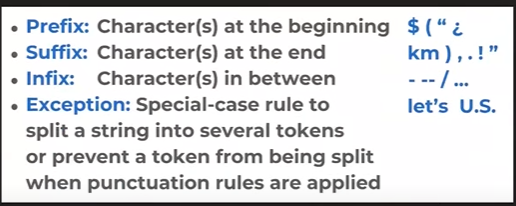


###We can use 'split function' or 'regular expression' or 'NLTK library' or 'spacy library' to perform this operation. Here we will use **spacy** library as this is a robust way of tokenizing the text.

In [408]:
import spacy
tokenizer=spacy.load('en_core_web_sm')

In [409]:
def make_tokens(text):  # method to create tokens
  text_new=[]
  for i in text.split():  # we are splitting the text to remove additional whitespaces present within the text
    text_new.append(i.strip())  # removing leading and trailing spaces of each word of the text
  return list(tokenizer(" ".join(text_new)))  # joining the words againg and passing it to the tokenizer

tokens=make_tokens("I just love A.I")
for token in tokens:  # iterating through the tokens
  print(token)


I
just
love
A.I


In [410]:
# Let's apply this method to our dataframe
df['Description']=df['Description'].apply(lambda x:make_tokens(x))
df.head()

,Name,Description,Genres
0,The Godfather,"[spanning, years, 1945, 1955, chronicle, secti...","Drama, Crime"
1,The Shawshank Redemption,"[framed, 1940s, double, murder, wife, lover, s...","Drama, Crime"
2,The Godfather Part II,"[continuing, sage, corleone, crime, family, yo...","Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"[ran, rich, carefree, happygolucky, second, ge...","Comedy, Drama, Romance"
4,Schindler's List,"[true, story, businessman, oscar, schindler, s...","Drama, History, War"


##**Stemming:**
###Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to same stem even if **the stem itself is not a valid word in the language**
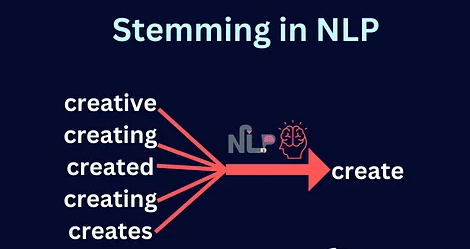

###We will use PorterStemmer algorithm from NLTK to perform this step

In [411]:
from nltk.stem.porter import PorterStemmer
def stem_word(tokens):  # method to convert a token to its stem
  for i in range(0,len(tokens)):
    tokens[i]=PorterStemmer().stem(str(tokens[i]))
  return tokens



In [412]:
# Let's use this function in our dataframe
df['Description']=df['Description'].apply(lambda x:stem_word(x))
df.head()

,Name,Description,Genres
0,The Godfather,"[span, year, 1945, 1955, chronicl, section, it...","Drama, Crime"
1,The Shawshank Redemption,"[frame, 1940, doubl, murder, wife, lover, stan...","Drama, Crime"
2,The Godfather Part II,"[continu, sage, corleon, crime, famili, young,...","Drama, Crime"
3,दिलवाले दुल्हनिया ले जायेंगे,"[ran, rich, carefre, happygolucki, second, gen...","Comedy, Drama, Romance"
4,Schindler's List,"[true, stori, businessman, oscar, schindler, s...","Drama, History, War"


##**Lemmatization:**
###Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root words belong to the language. In Lemmatization, the root word is called **Lemma**.

###If we want to display the root word (present in the language) for all the tokens, we will use Lemmatization instead of Stemming

###We will use **WordNetLemmatizer** from NLTK to understand this concept

In [413]:
nltk.download('punkt')  # required for using word_tokenizer
nltk.download('wordnet')  # required for using WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [414]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer=WordNetLemmatizer()
sentence="He was having an amazing game yesterday. He was scoring goals for fun. His dribbling was also amazing."
punctuations=string.punctuation
sentence_words=nltk.word_tokenize(sentence)
for word in sentence_words:
  if word in punctuations:
    sentence_words.remove(word)

for word in sentence_words:
  print("{0:15}{1:15}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))  # for lemmatization, we have to mention the parts of speech

He             He             
was            be             
having         have           
an             an             
amazing        amaze          
game           game           
yesterday      yesterday      
He             He             
was            be             
scoring        score          
goals          goals          
for            for            
fun            fun            
His            His            
dribbling      dribble        
was            be             
also           also           
amazing        amaze          
